# Flight Delay Prediction
## Problem Statement:

You are provided with a comprehensive dataset from a hotel booking system. The dataset includes various features such as the number of adults and children, duration of stay (split between weekend and weeknights), meal plan preference, requirement for parking space, lead time, arrival dates (year, month, date), market segment, guest history (repeated guest, number of previous cancellations, and number of previous bookings not canceled), average price per room, number of special requests, and booking status. The objective is to develop a predictive model that can accurately forecast the type of room a guest is likely to reserve (room_type_reserved). Successfully predicting the room_type_reserved will empower hotels to optimize room inventory management, tailor marketing strategies, enhance guest experiences through personalized services, improve revenue management through dynamic pricing, and boost operational efficiency by anticipating demand for various room types.

## Aim:
* To perform multi-class classification on room types that customer will likely to reserve

## Dataset Attributes
The dataset provided from a hotel booking system and contains various features that describe the booking details and customer preferences. Here is a brief overview of the dataset columns: 
* no_of_adults: The number of adults included in the booking.
* no_of_children: The number of children included in the booking.
* no_of_weekend_nights: The number of weekend nights booked.
* no_of_week_nights: The number of weeknights booked.
* type_of_meal_plan: The type of meal plan selected by the guest.
* required_car_parking_space: Indicates whether the guest required a car parking space.
* room_type_reserved: The type of room reserved by the guest.
* lead_time: The number of days between the booking date and the arrival date.
* arrival_year: The year of arrival.
* arrival_month: The month of arrival.
* arrival_date: The date of arrival.
* market_segment_type: The market segment from which the booking originated.
* repeated_guest: Indicates whether the guest has previously stayed at the hotel.
* no_of_previous_cancellations: The number of previous bookings that were canceled by the guest.
* no_of_previous_bookings_not_canceled: The number of previous bookings not canceled by the guest.
* avg_price_per_room: The average price per room for the booking.
* no_of_special_requests: The number of special requests made by the guest.
* booking_status: Indicates whether the booking was canceled or not.

# Load dataset

In [66]:
import pandas as pd
import numpy as np
import sqlite3
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

df=pd.read_csv('Combined_Flights_2022.csv')


In [67]:
df

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",GJT,DEN,False,False,1133,1123.0,0.0,-10.0,...,1140.0,1220.0,8.0,1245,-17.0,0.0,-2.0,1200-1259,1,0
1,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",HRL,IAH,False,False,732,728.0,0.0,-4.0,...,744.0,839.0,9.0,849,-1.0,0.0,-1.0,0800-0859,2,0
2,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1529,1514.0,0.0,-15.0,...,1535.0,1622.0,14.0,1639,-3.0,0.0,-1.0,1600-1659,2,0
3,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",IAH,GPT,False,False,1435,1430.0,0.0,-5.0,...,1446.0,1543.0,4.0,1605,-18.0,0.0,-2.0,1600-1659,2,0
4,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1135,1135.0,0.0,0.0,...,1154.0,1243.0,8.0,1245,6.0,0.0,0.0,1200-1259,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4078313,2022-03-31,Republic Airlines,MSY,EWR,False,True,1949,2014.0,25.0,25.0,...,2031.0,202.0,32.0,2354,NaN,NaN,NaN,2300-2359,5,1
4078314,2022-03-17,Republic Airlines,CLT,EWR,True,False,1733,1817.0,44.0,44.0,...,NaN,NaN,NaN,1942,NaN,NaN,NaN,1900-1959,3,0
4078315,2022-03-08,Republic Airlines,ALB,ORD,False,False,1700,2318.0,378.0,378.0,...,2337.0,52.0,7.0,1838,381.0,1.0,12.0,1800-1859,3,0
4078316,2022-03-25,Republic Airlines,EWR,PIT,False,True,2129,2322.0,113.0,113.0,...,2347.0,933.0,6.0,2255,NaN,NaN,NaN,2200-2259,2,1


# Questions
**Instructions:**
1.  Answer all questions.
2.  Justify your answers with appropriate reasoning, code, or calculations.
3.  Ensure your code is well-commented to explain your logic.
4.  Total Marks: 100

## Question 1 : Data Analysis (10 pt)
Summarize the data. How much data is present? What attributes/features are continuous valued? Which attributes are categorical?

Display the statistical values for each of the attributes, of the distributions for each attribute. Explain noticeable traits for key attributes. Are there any attributes that might require special treatment? If so, what special treatment might they require?

Analyze and discuss the relationships between the data attributes, and between the data attributes and label.

Analyze the relationship between all the features. Use appropriate visualization techniques.

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4078318 entries, 0 to 4078317
Data columns (total 61 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   FlightDate                               object 
 1   Airline                                  object 
 2   Origin                                   object 
 3   Dest                                     object 
 4   Cancelled                                bool   
 5   Diverted                                 bool   
 6   CRSDepTime                               int64  
 7   DepTime                                  float64
 8   DepDelayMinutes                          float64
 9   DepDelay                                 float64
 10  ArrTime                                  float64
 11  ArrDelayMinutes                          float64
 12  AirTime                                  float64
 13  CRSElapsedTime                           float64
 14  ActualElapsedTime 

In [5]:
# What attributes/features are continuous valued?
continuous_attributes = df.select_dtypes(include=['number']).columns.tolist()
categorical_attributes = df.select_dtypes(include=['object']).columns.tolist()

# Print the result
print("Continuous attributes:", continuous_attributes)
print("Categorical attributes:", categorical_attributes)

Continuous attributes: ['CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime', 'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime', 'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'DOT_ID_Marketing_Airline', 'Flight_Number_Marketing_Airline', 'DOT_ID_Operating_Airline', 'Flight_Number_Operating_Airline', 'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'OriginStateFips', 'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestStateFips', 'DestWac', 'DepDel15', 'DepartureDelayGroups', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrDelay', 'ArrDel15', 'ArrivalDelayGroups', 'DistanceGroup', 'DivAirportLandings']
Categorical attributes: ['FlightDate', 'Airline', 'Origin', 'Dest', 'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners', 'IATA_Code_Marketing_Airline', 'Operating_Airline', 'IATA_Code_Operating_Airline', 'Tail_Number', 'OriginCityName', 'OriginState', 'OriginStateNam

In [6]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'FlightDate': ['2022-04-04' '2022-04-03' '2022-04-02' '2022-04-01' '2022-04-15'
 '2022-04-09' '2022-04-10' '2022-04-17' '2022-04-18' '2022-04-19'
 '2022-04-20' '2022-04-21' '2022-04-22' '2022-04-11' '2022-04-24'
 '2022-04-25' '2022-04-26' '2022-04-27' '2022-04-28' '2022-04-29'
 '2022-04-12' '2022-04-13' '2022-04-14' '2022-04-05' '2022-04-06'
 '2022-04-07' '2022-04-08' '2022-04-30' '2022-04-16' '2022-04-23'
 '2022-02-28' '2022-02-06' '2022-02-07' '2022-02-08' '2022-02-09'
 '2022-02-11' '2022-02-12' '2022-02-13' '2022-02-15' '2022-02-17'
 '2022-02-18' '2022-02-19' '2022-02-20' '2022-02-21' '2022-02-23'
 '2022-02-24' '2022-02-25' '2022-02-26' '2022-02-27' '2022-02-02'
 '2022-02-14' '2022-02-16' '2022-02-22' '2022-02-04' '2022-02-05'
 '2022-02-10' '2022-02-03' '2022-02-01' '2022-07-19' '2022-07-20'
 '2022-07-21' '2022-07-24' '2022-07-25' '2022-07-26' '2022-07-27'
 '2022-07-28' '2022-07-31' '2022-07-01' '2022-07-02' '2022-07-04'
 '2022-07-07' '2022-07-08' '2022-07-09

In [7]:
# Display the statistical values for each of the attributes, of the distributions for each attribute. 
statistical_values = df.describe()
statistical_values

,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,...,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,DistanceGroup,DivAirportLandings
count,4.078318e+06,3.957885e+06,3.957823e+06,3.957823e+06,3.954079e+06,3.944916e+06,3.944916e+06,4.078318e+06,3.944916e+06,4.078318e+06,...,3.955652e+06,3.955652e+06,3.954076e+06,3.954076e+06,4.078318e+06,3.944916e+06,3.944916e+06,3.944916e+06,4.078318e+06,4.078318e+06
mean,1.329587e+03,1.334374e+03,1.601494e+01,1.309049e+01,1.457886e+03,1.578307e+01,1.110075e+02,1.413211e+02,1.358624e+02,7.978657e+02,...,1.697375e+01,1.356576e+03,1.455073e+03,7.894387e+00,1.486058e+03,7.528486e+00,2.164715e-01,-6.256103e-02,3.663516e+00,3.685098e-03
std,4.904801e+02,5.056219e+02,5.231498e+01,5.332016e+01,5.431841e+02,5.198424e+01,6.996246e+01,7.179635e+01,7.185501e+01,5.914742e+02,...,9.495407e+00,5.075580e+02,5.378428e+02,6.663118e+00,5.185078e+02,5.524625e+01,4.118393e-01,2.487442e+00,2.320848e+00,1.141331e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,-7.800000e+01,1.000000e+00,0.000000e+00,8.000000e+00,-4.800000e+01,1.400000e+01,3.100000e+01,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+02,0.000000e+00,-2.000000e+00,1.000000e+00,0.000000e+00
25%,9.140000e+02,9.170000e+02,0.000000e+00,-5.000000e+00,1.046000e+03,0.000000e+00,6.000000e+01,8.900000e+01,8.300000e+01,3.680000e+02,...,1.100000e+01,9.320000e+02,1.044000e+03,4.000000e+00,1.103000e+03,-1.400000e+01,0.000000e+00,-1.000000e+00,2.000000e+00,0.000000e+00
50%,1.320000e+03,1.325000e+03,0.000000e+00,-2.000000e+00,1.500000e+03,0.000000e+00,9.400000e+01,1.240000e+02,1.190000e+02,6.430000e+02,...,1.500000e+01,1.338000e+03,1.456000e+03,6.000000e+00,1.513000e+03,-5.000000e+00,0.000000e+00,-1.000000e+00,3.000000e+00,0.000000e+00
75%,1.735000e+03,1.744000e+03,1.100000e+01,1.100000e+01,1.914000e+03,1.000000e+01,1.410000e+02,1.710000e+02,1.670000e+02,1.035000e+03,...,1.900000e+01,1.758000e+03,1.909000e+03,9.000000e+00,1.920000e+03,1.000000e+01,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00
max,2.359000e+03,2.400000e+03,7.223000e+03,7.223000e+03,2.400000e+03,7.232000e+03,7.270000e+02,6.900000e+02,7.640000e+02,5.095000e+03,...,2.210000e+02,2.400000e+03,2.400000e+03,2.900000e+02,2.359000e+03,7.232000e+03,1.000000e+00,1.200000e+01,1.100000e+01,9.000000e+00


In [69]:
# checking for null values across all columns
df.isna().sum()

FlightDate                 0
Airline                    0
Origin                     0
Dest                       0
Cancelled                  0
                       ...  
ArrDel15              133402
ArrivalDelayGroups    133402
ArrTimeBlk                 0
DistanceGroup              0
DivAirportLandings         0
Length: 61, dtype: int64

In [70]:
#dropping missing values
df.dropna(inplace=True)

In [71]:
df

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",GJT,DEN,False,False,1133,1123.0,0.0,-10.0,...,1140.0,1220.0,8.0,1245,-17.0,0.0,-2.0,1200-1259,1,0
1,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",HRL,IAH,False,False,732,728.0,0.0,-4.0,...,744.0,839.0,9.0,849,-1.0,0.0,-1.0,0800-0859,2,0
2,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1529,1514.0,0.0,-15.0,...,1535.0,1622.0,14.0,1639,-3.0,0.0,-1.0,1600-1659,2,0
3,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",IAH,GPT,False,False,1435,1430.0,0.0,-5.0,...,1446.0,1543.0,4.0,1605,-18.0,0.0,-2.0,1600-1659,2,0
4,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1135,1135.0,0.0,0.0,...,1154.0,1243.0,8.0,1245,6.0,0.0,0.0,1200-1259,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4078308,2022-03-31,Republic Airlines,EYW,EWR,False,False,1617,1953.0,216.0,216.0,...,2012.0,2244.0,12.0,1929,207.0,1.0,12.0,1900-1959,5,0
4078309,2022-03-31,Republic Airlines,CLE,EWR,False,False,1418,1801.0,223.0,223.0,...,1815.0,1920.0,10.0,1609,201.0,1.0,12.0,1600-1659,2,0
4078310,2022-03-31,Republic Airlines,IAD,PIT,False,False,1750,2105.0,195.0,195.0,...,2119.0,2156.0,5.0,1901,180.0,1.0,12.0,1900-1959,1,0
4078312,2022-03-19,Republic Airlines,EWR,MEM,False,False,2035,2309.0,154.0,154.0,...,2323.0,47.0,5.0,2237,135.0,1.0,9.0,2200-2259,4,0


In [90]:
df['Dest'].nunique()

375

In [91]:
df['Origin'].nunique()

375

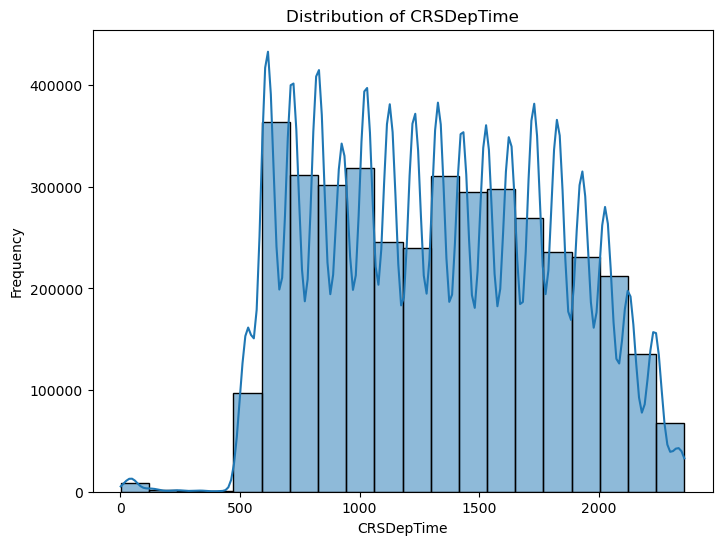

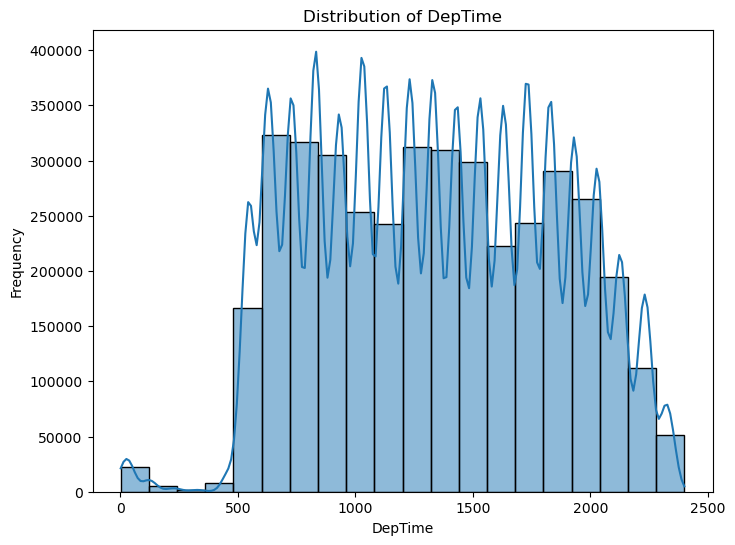

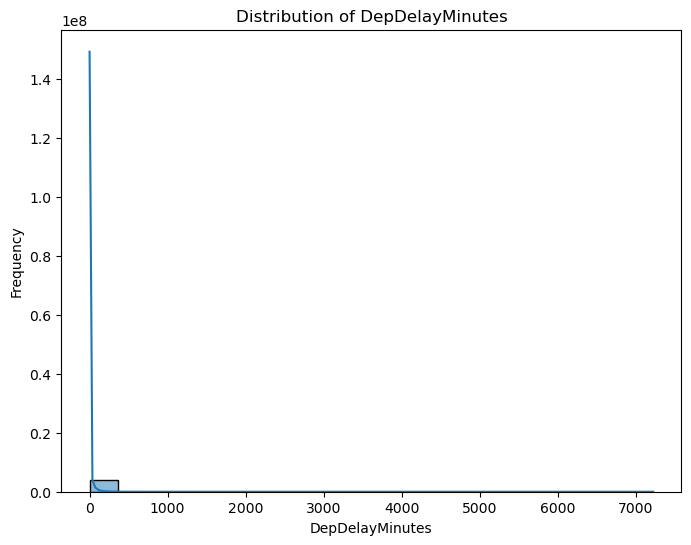

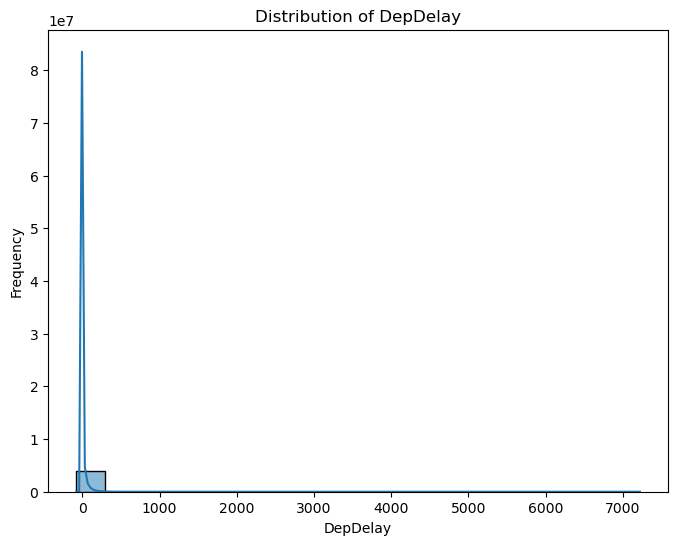

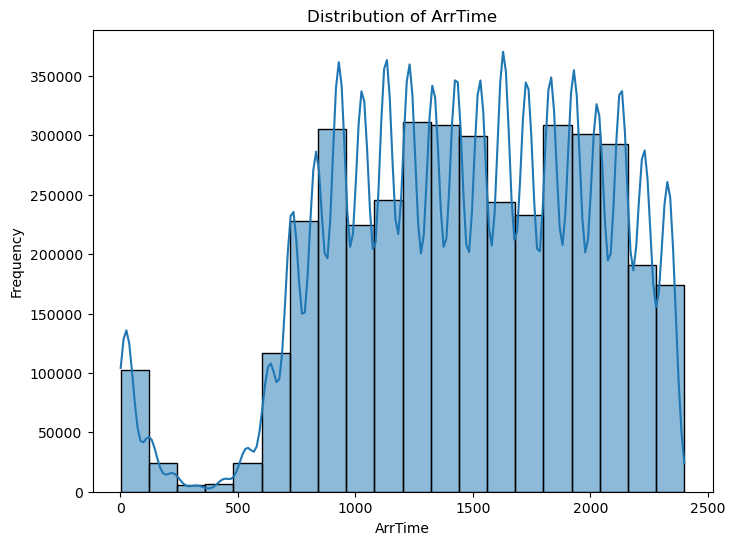

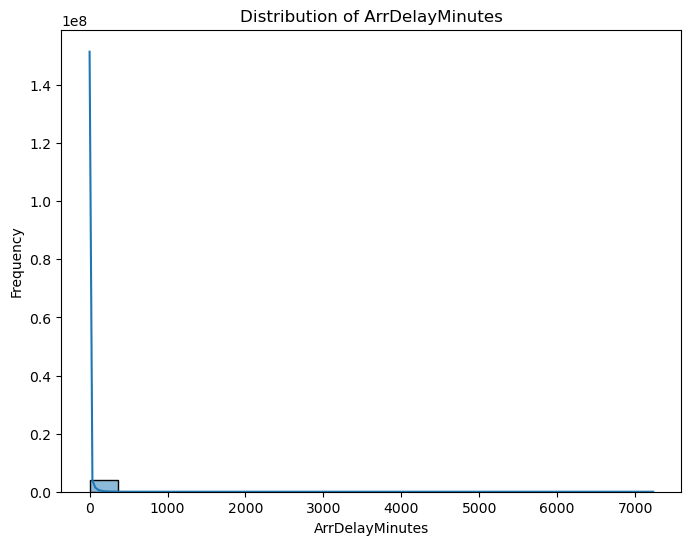

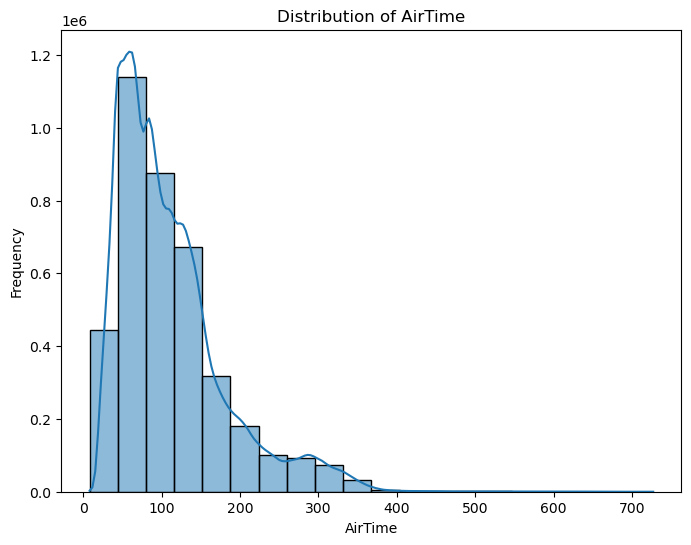

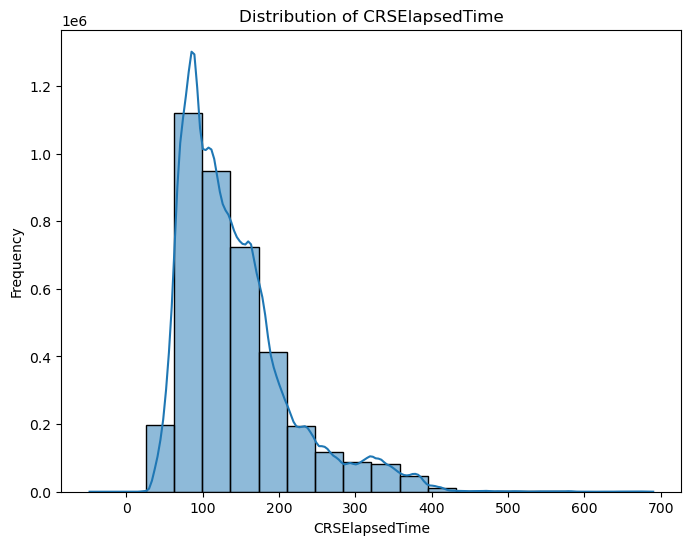

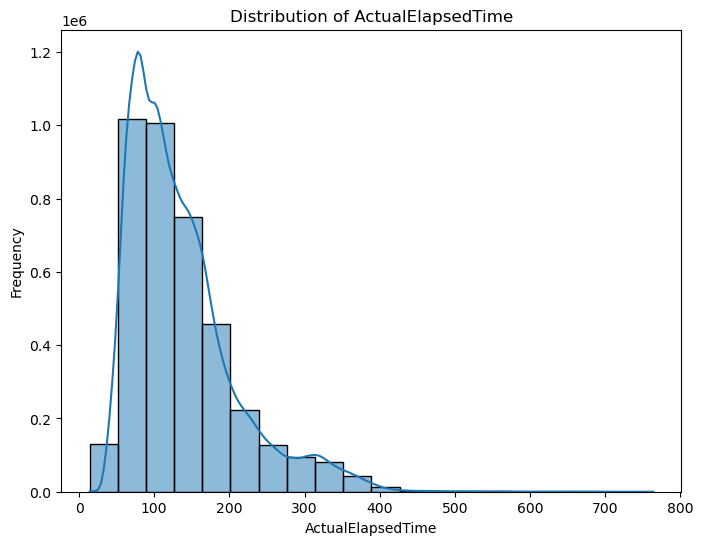

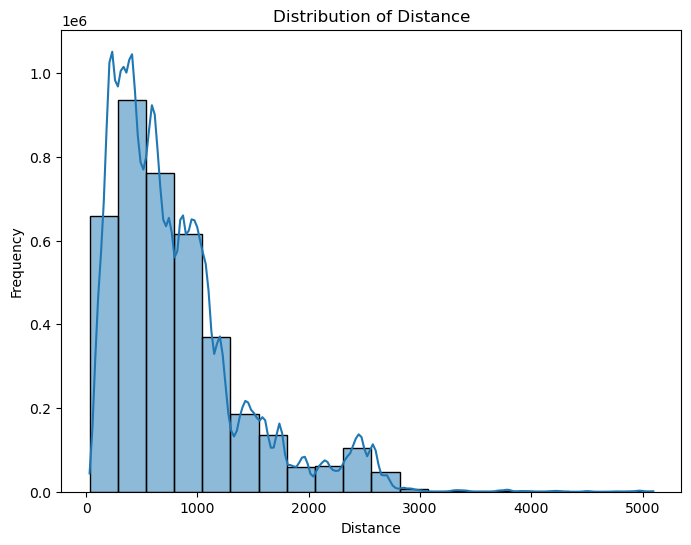

KeyboardInterrupt: 

<Figure size 800x600 with 0 Axes>

In [11]:
#
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_attribute_distribution(df):
    # Histograms for numerical attributes
    num_attributes = df.select_dtypes(include=['number']).columns
    for col in num_attributes:
        plt.figure(figsize=(8, 6))
        sns.histplot(df[col], bins=20, kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

    # Countplots for categorical attributes
    cat_attributes = df.select_dtypes(include=['object']).columns
    for col in cat_attributes:
        plt.figure(figsize=(6, 6))
        sns.countplot(x=col, data=df, palette='Set2')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

# Example usage:
# Assuming 'df' is your DataFrame
visualize_attribute_distribution(df)


In [109]:
# Select relevant columns
columns = ['Airline', 'Origin', 'Dest', 'CRSDepTime', 'CRSArrTime', 'Month', 'DayofMonth','Year', 'ArrDelay']
data = df[columns]

In [110]:
data

,Airline,Origin,Dest,CRSDepTime,CRSArrTime,Month,DayofMonth,Year,ArrDelay
0,"Commutair Aka Champlain Enterprises, Inc.",GJT,DEN,1133,1245,4,4,2022,-17.0
1,"Commutair Aka Champlain Enterprises, Inc.",HRL,IAH,732,849,4,4,2022,-1.0
2,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,1529,1639,4,4,2022,-3.0
3,"Commutair Aka Champlain Enterprises, Inc.",IAH,GPT,1435,1605,4,4,2022,-18.0
4,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,1135,1245,4,4,2022,6.0
...,...,...,...,...,...,...,...,...,...
4078308,Republic Airlines,EYW,EWR,1617,1929,3,31,2022,207.0
4078309,Republic Airlines,CLE,EWR,1418,1609,3,31,2022,201.0
4078310,Republic Airlines,IAD,PIT,1750,1901,3,31,2022,180.0
4078312,Republic Airlines,EWR,MEM,2035,2237,3,19,2022,135.0


In [111]:
data['Delayed'] = data['ArrDelay'].apply(lambda x: 1 if x > 15 else 0)

C:\Users\kashm\AppData\Local\Temp\ipykernel_32872\2575214444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Delayed'] = data['ArrDelay'].apply(lambda x: 1 if x > 15 else 0)


In [112]:
data

,Airline,Origin,Dest,CRSDepTime,CRSArrTime,Month,DayofMonth,Year,ArrDelay,Delayed
0,"Commutair Aka Champlain Enterprises, Inc.",GJT,DEN,1133,1245,4,4,2022,-17.0,0
1,"Commutair Aka Champlain Enterprises, Inc.",HRL,IAH,732,849,4,4,2022,-1.0,0
2,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,1529,1639,4,4,2022,-3.0,0
3,"Commutair Aka Champlain Enterprises, Inc.",IAH,GPT,1435,1605,4,4,2022,-18.0,0
4,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,1135,1245,4,4,2022,6.0,0
...,...,...,...,...,...,...,...,...,...,...
4078308,Republic Airlines,EYW,EWR,1617,1929,3,31,2022,207.0,1
4078309,Republic Airlines,CLE,EWR,1418,1609,3,31,2022,201.0,1
4078310,Republic Airlines,IAD,PIT,1750,1901,3,31,2022,180.0,1
4078312,Republic Airlines,EWR,MEM,2035,2237,3,19,2022,135.0,1


In [113]:
data['Airline'].unique()

array(['Commutair Aka Champlain Enterprises, Inc.',
       'GoJet Airlines, LLC d/b/a United Express',
       'Air Wisconsin Airlines Corp', 'Mesa Airlines Inc.',
       'Southwest Airlines Co.', 'Republic Airlines', 'Endeavor Air Inc.',
       'American Airlines Inc.', 'Capital Cargo International',
       'SkyWest Airlines Inc.', 'Alaska Airlines Inc.', 'JetBlue Airways',
       'Delta Air Lines Inc.', 'Frontier Airlines Inc.', 'Allegiant Air',
       'Hawaiian Airlines Inc.', 'Envoy Air', 'Spirit Air Lines',
       'Comair Inc.', 'Horizon Air', 'United Air Lines Inc.'],
      dtype=object)

In [38]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, accuracy_score

# # Encode categorical variables
# le = LabelEncoder()
# data['Airline'] = le.fit_transform(data['Airline'])
# data['Origin'] = le.fit_transform(data['Origin'])
# data['Dest'] = le.fit_transform(data['Dest'])

C:\Users\kashm\AppData\Local\Temp\ipykernel_32872\3312072556.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Airline'] = le.fit_transform(data['Airline'])
C:\Users\kashm\AppData\Local\Temp\ipykernel_32872\3312072556.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Origin'] = le.fit_transform(data['Origin'])
C:\Users\kashm\AppData\Local\Temp\ipykernel_32872\3312072556.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [114]:
# checking if the data is imbalance --> Count occurrences of each class label
class_counts = data['Delayed'].value_counts()
print(class_counts)

0    3118787
1     826129
Name: Delayed, dtype: int64


In [115]:
import pandas as pd
from sklearn.utils import resample

# Assuming df is your original DataFrame with the 'Delayed' column as the target

# Separate majority and minority classes
df_majority = data[data['Delayed'] == 0]
df_minority = data[data['Delayed'] == 1]

# Downsample majority class
# We resample the majority class (class 0) to have the same number of samples as class 1
df_majority_downsampled = resample(df_majority, 
                                   replace=False,    # Sample without replacement
                                   n_samples=len(df_minority),  # Match minority class
                                   random_state=42)  # Reproducible results

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Shuffle the dataset to ensure randomness
df_downsampled = df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the class distribution after undersampling
print(df_downsampled['Delayed'].value_counts())


0    826129
1    826129
Name: Delayed, dtype: int64


In [116]:
df_downsampled

,Airline,Origin,Dest,CRSDepTime,CRSArrTime,Month,DayofMonth,Year,ArrDelay,Delayed
0,Southwest Airlines Co.,DAL,MAF,1820,1930,7,10,2022,-11.0,0
1,JetBlue Airways,DCA,BOS,730,859,3,30,2022,20.0,1
2,Southwest Airlines Co.,ISP,BWI,1540,1655,5,24,2022,-12.0,0
3,SkyWest Airlines Inc.,MSP,FSD,2255,2350,5,8,2022,537.0,1
4,Envoy Air,XNA,DFW,1412,1540,1,3,2022,-29.0,0
...,...,...,...,...,...,...,...,...,...,...
1652253,Air Wisconsin Airlines Corp,ORD,LEX,1405,1634,7,7,2022,-29.0,0
1652254,American Airlines Inc.,PHL,TPA,1840,2114,6,1,2022,79.0,1
1652255,American Airlines Inc.,ORD,PHL,2020,2322,3,30,2022,-10.0,0
1652256,United Air Lines Inc.,DEN,ORD,1921,2252,7,31,2022,13.0,0


In [117]:
df_downsampled['Airline'].unique()

array(['Southwest Airlines Co.', 'JetBlue Airways',
       'SkyWest Airlines Inc.', 'Envoy Air', 'Alaska Airlines Inc.',
       'Capital Cargo International', 'Air Wisconsin Airlines Corp',
       'Mesa Airlines Inc.', 'American Airlines Inc.',
       'Delta Air Lines Inc.', 'Comair Inc.', 'Allegiant Air',
       'United Air Lines Inc.', 'Endeavor Air Inc.', 'Republic Airlines',
       'Horizon Air', 'Frontier Airlines Inc.',
       'Commutair Aka Champlain Enterprises, Inc.',
       'Hawaiian Airlines Inc.', 'Spirit Air Lines',
       'GoJet Airlines, LLC d/b/a United Express'], dtype=object)

In [118]:
df_downsampled['Origin'].unique()

array(['DAL', 'DCA', 'ISP', 'MSP', 'XNA', 'LAX', 'PDX', 'ORD', 'BWI',
       'DEN', 'MSY', 'ABQ', 'HPN', 'PHX', 'DFW', 'FLL', 'TPA', 'RST',
       'SFO', 'SHV', 'BDL', 'JAX', 'DSM', 'BTR', 'ATL', 'ELP', 'BTV',
       'MEM', 'BUF', 'RSW', 'MCO', 'LGA', 'LAS', 'DRO', 'FAT', 'RDM',
       'EWR', 'PIE', 'ONT', 'DTW', 'PHL', 'RDU', 'JFK', 'SMF', 'SRQ',
       'SAT', 'IAH', 'MIA', 'HNL', 'CLT', 'ASE', 'EUG', 'COS', 'CLE',
       'MSO', 'SEA', 'PNS', 'IAD', 'CMH', 'BUR', 'BOS', 'BIL', 'BHM',
       'EYW', 'AVL', 'SNA', 'DBQ', 'SLC', 'SYR', 'BNA', 'ORF', 'LWS',
       'OGG', 'GRB', 'MDW', 'SJC', 'AUS', 'PGD', 'TRI', 'ACT', 'TYS',
       'OAK', 'ATW', 'VPS', 'MYR', 'CVG', 'PVD', 'PIT', 'IND', 'ROA',
       'JAC', 'GSO', 'AEX', 'MKE', 'HOU', 'SJU', 'PBI', 'DLH', 'MAF',
       'SAV', 'CWA', 'STL', 'CHS', 'STT', 'BIH', 'BOI', 'TUS', 'SFB',
       'PAE', 'MLB', 'LIH', 'ALB', 'MCI', 'FAY', 'KOA', 'RNO', 'AMA',
       'STX', 'SDF', 'CHA', 'LBB', 'OGS', 'ECP', 'LFT', 'RIC', 'GSP',
       'FWA', 'GRR',

In [119]:
df_downsampled['Origin'].nunique()

375

In [120]:
df_downsampled['Dest'].unique()

array(['MAF', 'BOS', 'BWI', 'FSD', 'DFW', 'ASE', 'SAN', 'DAY', 'BDL',
       'MCO', 'MDW', 'IAH', 'ORD', 'BFL', 'EWR', 'PVD', 'AUS', 'MSP',
       'CLT', 'IAD', 'DCA', 'LAS', 'DAL', 'KOA', 'PHX', 'CRW', 'LGA',
       'EVV', 'DEN', 'PDX', 'DSM', 'SLC', 'SEA', 'AVL', 'FLL', 'TPA',
       'ATL', 'PSP', 'BTV', 'LAX', 'ATW', 'SWO', 'LBB', 'BTR', 'RSW',
       'RIC', 'GRI', 'SFO', 'LIT', 'TOL', 'RDU', 'LIH', 'SYR', 'CAE',
       'MSN', 'OAK', 'IND', 'SAV', 'EUG', 'BNA', 'SJC', 'PBI', 'STL',
       'JAN', 'JFK', 'PGV', 'ELP', 'MCI', 'XNA', 'COU', 'PHL', 'PWM',
       'DTW', 'EYW', 'HNL', 'RNO', 'SAF', 'MIA', 'ROC', 'AZA', 'SRQ',
       'SJU', 'CLE', 'SNA', 'ALO', 'GSP', 'PQI', 'CVG', 'GRB', 'HSV',
       'GRR', 'TYS', 'HOU', 'PAE', 'ACY', 'BIS', 'CRP', 'SMF', 'SDF',
       'OMA', 'MSY', 'GEG', 'BHM', 'GTR', 'OGG', 'RDM', 'ICT', 'LGB',
       'ORF', 'MTJ', 'PIT', 'HPN', 'CHS', 'BUF', 'GSO', 'BZN', 'JAX',
       'BOI', 'MFR', 'FAR', 'PSC', 'SGU', 'PGD', 'FCA', 'SFB', 'TUS',
       'LEX', 'BLI',

In [121]:
df_downsampled['Dest'].nunique()

374

In [122]:
df_downsampled['Month'].unique()

array([7, 3, 5, 1, 2, 6, 4], dtype=int64)

In [123]:
df_downsampled['DayofMonth'].unique()

array([10, 30, 24,  8,  3, 13, 22, 25, 26, 31,  7, 21, 20, 29, 15,  6, 12,
       28, 18,  9,  4, 14,  2, 11, 16, 19, 23,  5, 17, 27,  1],
      dtype=int64)

In [124]:
df_new = df_downsampled.copy()

In [125]:
df_new

,Airline,Origin,Dest,CRSDepTime,CRSArrTime,Month,DayofMonth,Year,ArrDelay,Delayed
0,Southwest Airlines Co.,DAL,MAF,1820,1930,7,10,2022,-11.0,0
1,JetBlue Airways,DCA,BOS,730,859,3,30,2022,20.0,1
2,Southwest Airlines Co.,ISP,BWI,1540,1655,5,24,2022,-12.0,0
3,SkyWest Airlines Inc.,MSP,FSD,2255,2350,5,8,2022,537.0,1
4,Envoy Air,XNA,DFW,1412,1540,1,3,2022,-29.0,0
...,...,...,...,...,...,...,...,...,...,...
1652253,Air Wisconsin Airlines Corp,ORD,LEX,1405,1634,7,7,2022,-29.0,0
1652254,American Airlines Inc.,PHL,TPA,1840,2114,6,1,2022,79.0,1
1652255,American Airlines Inc.,ORD,PHL,2020,2322,3,30,2022,-10.0,0
1652256,United Air Lines Inc.,DEN,ORD,1921,2252,7,31,2022,13.0,0


In [126]:
# Encode categorical variables
label_encoders = {}
for col in ['Airline', 'Origin', 'Dest']:
    le = LabelEncoder()
    df_new[col] = le.fit_transform(df_new[col])
    label_encoders[col] = le



In [127]:
df_new

,Airline,Origin,Dest,CRSDepTime,CRSArrTime,Month,DayofMonth,Year,ArrDelay,Delayed
0,18,91,215,1820,1930,7,10,2022,-11.0,0
1,14,94,48,730,859,3,30,2022,20.0,1
2,18,179,60,1540,1655,5,24,2022,-12.0,0
3,17,241,133,2255,2350,5,8,2022,537.0,1
4,9,370,98,1412,1540,1,3,2022,-29.0,0
...,...,...,...,...,...,...,...,...,...,...
1652253,0,255,203,1405,1634,7,7,2022,-29.0,0
1652254,3,269,352,1840,2114,6,1,2022,79.0,1
1652255,3,255,269,2020,2322,3,30,2022,-10.0,0
1652256,20,97,255,1921,2252,7,31,2022,13.0,0


In [128]:
# Split data into features and target
X = df_new.drop(['ArrDelay', 'Delayed'], axis=1)
y = df_new['Delayed']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [129]:
%%time
# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


CPU times: total: 4min 4s
Wall time: 7min 37s


RandomForestClassifier(random_state=42)

In [130]:
# Make predictions
y_pred = model.predict(X_test)

In [131]:
# Evaluate the model
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

              precision    recall  f1-score   support

           0       0.63      0.64      0.63    247681
           1       0.63      0.62      0.63    247997

    accuracy                           0.63    495678
   macro avg       0.63      0.63      0.63    495678
weighted avg       0.63      0.63      0.63    495678

Accuracy: 0.6309115998692699


In [133]:
def predict_delay(airline, origin, dest, crs_dep_time, crs_arr_time, year, month, day):
    new_data = pd.DataFrame({
        'Airline': [airline],
        'Origin': [origin],
        'Dest': [dest],
        'CRSDepTime': [crs_dep_time],
        'CRSArrTime': [crs_arr_time],
        'Year': [year],
        'Month': [month],
        'DayofMonth': [day]
    })

    # Apply label encoding
    for col in ['Airline', 'Origin', 'Dest']:
        le = label_encoders[col]
        new_data[col] = le.transform(new_data[col])

    # Convert to numpy array and scale the data
    new_data_array = new_data.values
    new_data_scaled = scaler.transform(new_data_array)

    # Make prediction
    prediction = model.predict(new_data_scaled)
    return "Delayed" if prediction[0] else "On Time"

# Example usage
print(predict_delay('Republic Airlines', 'EYW', 'EWR', 1617, 1929, 2022, 3, 31))

Delayed


C:\Users\kashm\Anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [134]:
def predict_delay(airline, origin, dest, crs_dep_time, crs_arr_time, year, month, day):
    new_data = pd.DataFrame({
        'Airline': [airline],
        'Origin': [origin],
        'Dest': [dest],
        'CRSDepTime': [crs_dep_time],
        'CRSArrTime': [crs_arr_time],
        'Year': [year],
        'Month': [month],
        'DayofMonth': [day]
    })

    # Apply label encoding
    for col in ['Airline', 'Origin', 'Dest']:
        le = label_encoders[col]
        new_data[col] = le.transform(new_data[col])

    # Convert to numpy array and scale the data
    new_data_array = new_data.values
    new_data_scaled = scaler.transform(new_data_array)

    # Make prediction
    prediction = model.predict(new_data_scaled)
    return "Delayed" if prediction[0] else "On Time"

# Example usage
print(predict_delay('Commutair Aka Champlain Enterprises, Inc.', 'DRO', 'DEN', 1135, 1245, 2022, 4, 4))

On Time


C:\Users\kashm\Anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [137]:
def predict_delay(airline, origin, dest, crs_dep_time, crs_arr_time, year, month, day):
    new_data = pd.DataFrame({
        'Airline': [airline],
        'Origin': [origin],
        'Dest': [dest],
        'CRSDepTime': [crs_dep_time],
        'CRSArrTime': [crs_arr_time],
        'Year': [year],
        'Month': [month],
        'DayofMonth': [day]
    })

    # Apply label encoding
    for col in ['Airline', 'Origin', 'Dest']:
        le = label_encoders[col]
        new_data[col] = le.transform(new_data[col])

    # Convert to numpy array and scale the data
    new_data_array = new_data.values
    new_data_scaled = scaler.transform(new_data_array)

    # Make prediction
    prediction = model.predict(new_data_scaled)
    return "Delayed" if prediction[0] else "On Time"

# Example usage
print(predict_delay('Spirit Air Lines', 'IND', 'EWR', 2150, 2349, 2022, 4, 24))

Delayed


C:\Users\kashm\Anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [138]:
def predict_delay(airline, origin, dest, crs_dep_time, crs_arr_time, year, month, day):
    new_data = pd.DataFrame({
        'Airline': [airline],
        'Origin': [origin],
        'Dest': [dest],
        'CRSDepTime': [crs_dep_time],
        'CRSArrTime': [crs_arr_time],
        'Year': [year],
        'Month': [month],
        'DayofMonth': [day]
    })

    # Apply label encoding
    for col in ['Airline', 'Origin', 'Dest']:
        le = label_encoders[col]
        new_data[col] = le.transform(new_data[col])

    # Convert to numpy array and scale the data
    new_data_array = new_data.values
    new_data_scaled = scaler.transform(new_data_array)

    # Make prediction
    prediction = model.predict(new_data_scaled)
    return "Delayed" if prediction[0] else "On Time"

# Example usage
print(predict_delay('Spirit Air Lines', 'IND', 'EWR', 2019, 1025, 2024, 6, 24))

On Time


C:\Users\kashm\Anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [139]:
#Saving Scikitlearn models
import joblib
joblib.dump(model, "random_forest_model_wh.pkl")

['random_forest_model_wh.pkl']

In [143]:
import joblib

filename = 'random_forest_model_wh.joblib'
joblib.dump(model, filename)
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result, '% Accuracy')

MemoryError: could not allocate 11608016 bytes

In [ ]:
import pickle

filename = 'random_forest_model_wh.sav'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

# load the model from disk
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

result = loaded_model.score(X_test, y_test)
print(result, '% Accuracy')

In [142]:
# import pickle
# filename = 'random_forest_model_wh.sav'
# pickle.dump(model, open(filename, 'wb'))
# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, y_test)
# print(result,'% Acuuracy')

MemoryError: 

In [144]:
df_new.to_csv("flight_cleaned_rf_wh.csv")

## Data Pre-processing & Feature Engineering

##  Modeling 


## Evaluation and Reporting


##  External validation 
